In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    seed = 123,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1212 files belonging to 6 classes.


In [5]:
class_names = dataset.class_names
class_names

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

In [6]:
len(dataset)

38

In [7]:
38*32

1216

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[4 4 3 4 4 0 5 0 0 0 3 2 0 1 5 0 4 4 4 1 3 4 4 3 4 2 4 2 5 4 4 0]


In [13]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]]

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]]

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]]

 ...

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]]

 [[252.01562 252.01562 252.01562]
  [252.01562 252.01562 252.01562]
  [252.01562 252.01562 252.01562]
  ...
  [255.      255.      255.     ]
  [2

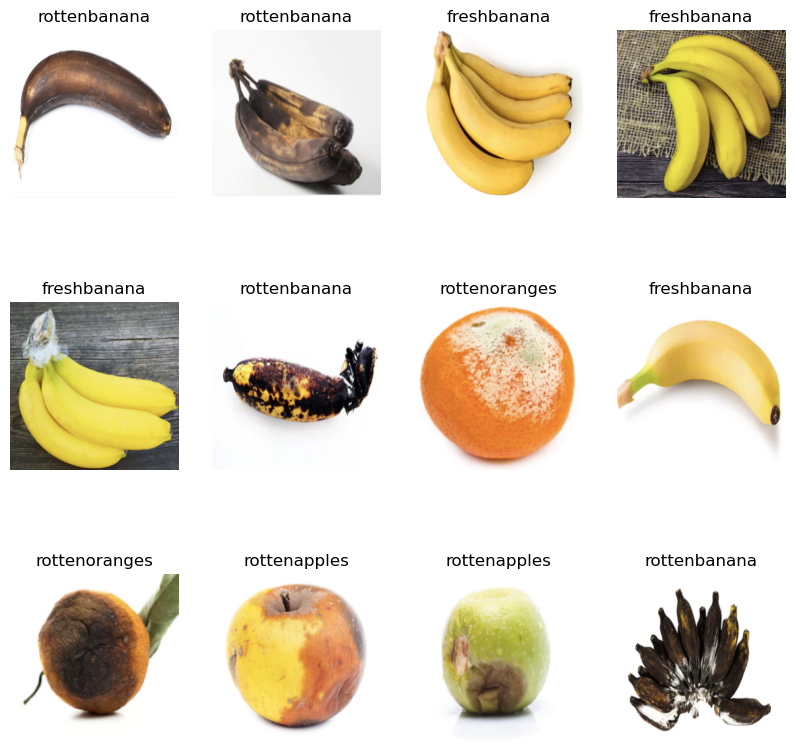

In [18]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [19]:
def get_dataset(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle =True, shuffle_size=1000):
    assert(train_split+test_split+val_split)==1
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [20]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [21]:
len(train_ds)

30

In [23]:
len(val_ds)

3

In [24]:
len(test_ds)

5